In [1]:
pip install biopython
pip install matplotlib
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import numpy
from Bio.SeqUtils import MeltingTemp as mt
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [3]:
dna_1 = Seq('ATGATCTCGTAACAGGTAACAAACC')
dna_2 = Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAA')

Nomor 1

In [4]:

len_dna_1 = len(dna_1)
len_dna_2 = len(dna_2)
print("Panjang DNA 1 : ", len_dna_1)
print("Panjang DNA 2 : ", len_dna_2)

Panjang DNA 1 :  25
Panjang DNA 2 :  39


Nomor 2

In [5]:
def count_freq(dna) : 
    freq_A = dna.count('A')
    freq_T = dna.count('T')
    freq_G = dna.count('G')
    freq_C = dna.count('C')
    freq = {
        'A' : freq_A,
        'T' : freq_T,
        'G' : freq_G,
        'C' : freq_C
    }
    return freq

In [6]:
freq_DNA_1 = count_freq(dna_1)
print("Frekuensi basa dna 1 : \n",freq_DNA_1)

Frekuensi basa dna 1 : 
 {'A': 10, 'T': 5, 'G': 4, 'C': 6}


In [7]:
freq_DNA_2 = count_freq(dna_2)
print("Frekuensi basa dna 2 : \n",freq_DNA_2)

Frekuensi basa dna 2 : 
 {'A': 16, 'T': 9, 'G': 4, 'C': 10}


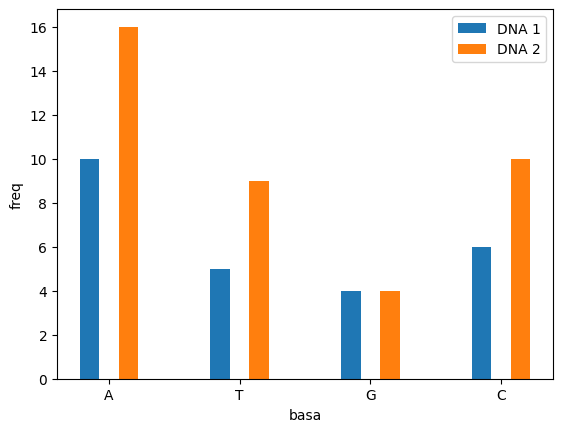

In [10]:
# Mengatur lebar batang
bar_width = 0.15

# Posisi batang pada sumbu x
indices = numpy.arange(len(freq_DNA_1))

# Membuat grafik batang berdampingan
plt.bar(indices - bar_width, list(freq_DNA_1.values()), bar_width, label="DNA 1")
plt.bar(indices + bar_width, list(freq_DNA_2.values()), bar_width, label="DNA 2")

# Menambahkan label dan judul
plt.xlabel('basa')
plt.ylabel('freq')
plt.xticks(indices, list(freq_DNA_1.keys()))
plt.legend()

# Menampilkan grafik
plt.show()

Nomor 3

In [11]:
def content(dna):
    at_content = float(dna.count('A') + dna.count('T')) / len(dna) * 100
    gc_content = 100 - at_content
    return at_content , gc_content


In [12]:
at_content_dna1 , gc_content_dna1 = content(dna_1)
at_content_dna2 , gc_content_dna2 = content(dna_2)

print(f"AT Content DNA 1 :{at_content_dna1:.2f}%")
print(f"GC Content DNA 1 :{gc_content_dna1:.2f}%")
print(f"AT Content DNA 2 :{at_content_dna2:.2f}%")
print(f"GC Content DNA 2 :{gc_content_dna2:.2f}%")


AT Content DNA 1 :60.00%
GC Content DNA 1 :40.00%
AT Content DNA 2 :64.10%
GC Content DNA 2 :35.90%


In [14]:
def melting(dna):
    Wallace = mt.Tm_Wallace(dna)
    GC = mt.Tm_GC(dna)
    NN = mt.Tm_NN(dna)
    melting_point = {
        'Wallace' : str(Wallace)+'°C',
        'GC' : str(GC) + '°C' ,
        'NN' : str(NN) + '°C'
    }
    return melting_point


In [15]:
melting_dna_1 = melting(dna_1)
melting_dna_2 = melting(dna_2)
print("Melting point DNA 1 :\n",melting_dna_1)
print("Melting point DNA 2 :\n",melting_dna_2)

Melting point DNA 1 :
 {'Wallace': '70.0°C', 'GC': '52.30290207197791°C', 'NN': '53.215432015032036°C'}
Melting point DNA 2 :
 {'Wallace': '106.0°C', 'GC': '59.236235405311234°C', 'NN': '61.21327467680533°C'}


Nomor 4

In [16]:
def gc_skew(dna, window=2):
    skews = []
    for i in range(0, len(dna), window):
        subseq = dna[i:i+window]
        g_count = subseq.count('G')
        c_count = subseq.count('C')
        if g_count + c_count !=0:
            skew = (g_count - c_count)/(g_count + c_count) 
            skews.append(skew)
        else:
            skews.append(0)

    return skews

In [17]:
skew1 = gc_skew(dna_1)
skew2 = gc_skew(dna_2)

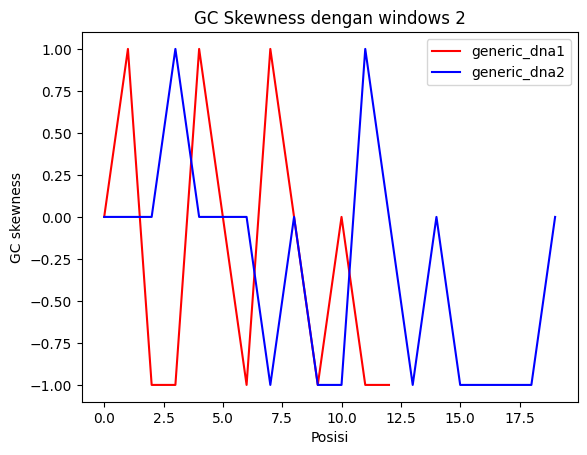

In [18]:
plt.plot(skew1, label='generic_dna1' , color = 'red')
plt.plot(skew2, label='generic_dna2' , color = 'blue')

plt.xlabel('Posisi')
plt.ylabel('GC skewness')
plt.title('GC Skewness dengan windows 2')

plt.legend()
plt.show()

Nomor 5

In [20]:
global_alignments = pairwise2.align.globalxx(dna_1, dna_2) 
local_alignments = pairwise2.align.localxx(dna_1, dna_2)
print('Global alignment:\n') 
print(format_alignment(*global_alignments[0]))
print('Local alignment:\n') 
print(format_alignment(*local_alignments[0]))

Global alignment:

ATG-A----TCTCGTA-AC------AGGTAACAAACC------
||  |    | |  || ||      ||||||||||||      
AT-TAAAGGT-T--TATACCTTCCCAGGTAACAAACCAACCAA
  Score=21

Local alignment:

1 ATG-A----TCTCGTA-AC------AGGTAACAAAC----C
  ||  |    | |  || ||      |||||||||||    |
1 AT-TAAAGGT-T--TATACCTTCCCAGGTAACAAACCAACC
  Score=21

